In [13]:
# ✅ Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ✅ Load the Iris dataset
df = pd.read_csv("../data/Iris.csv")

# ✅ Quick overview
print("\n✅ Dataset Shape:", df.shape)
print("\n✅ Dataset Preview:\n")
print(df.head())



✅ Dataset Shape: (150, 6)

✅ Dataset Preview:

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [15]:
# ✅ Encode target labels
label_encoder = LabelEncoder()

# ✅ Check column name (case sensitive)
print("\n✅ Column names in dataset:\n", df.columns)

# ✅ Fit on correct column name (check if it's 'Species' or something else)
df['target'] = label_encoder.fit_transform(df['Species'])

# ✅ Feature and Target Split
X = df.drop(['Species', 'target', 'Id'], axis=1)
y = df['target']

# ✅ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\n✅ Data Preprocessing Completed.")



✅ Column names in dataset:
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

✅ Data Preprocessing Completed.


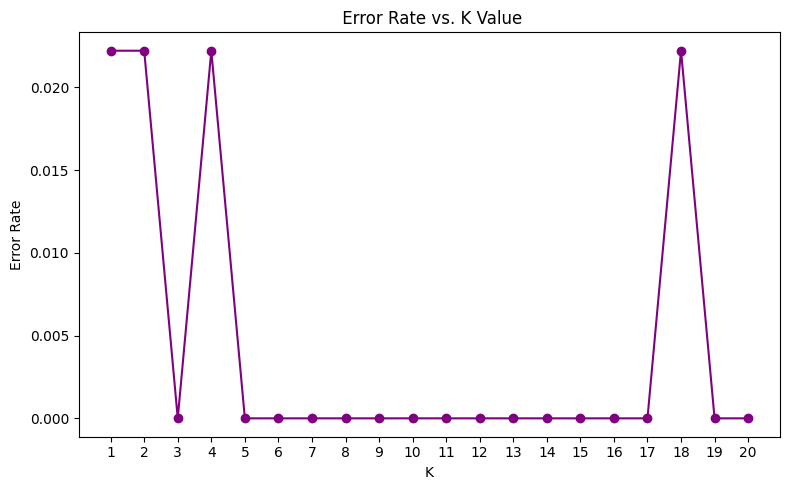

In [17]:
# ✅ Finding Optimal K using Error Rate

error_rate = []

# Test K values from 1 to 20
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error = np.mean(pred_k != y_test)
    error_rate.append(error)

# ✅ Plot K vs Error Rate
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), error_rate, marker='o', linestyle='-', color='purple')
plt.title(' Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.xticks(range(1, 21))
plt.tight_layout()
plt.savefig('../visuals/k_vs_error.png')
plt.show()


In [18]:
# ✅ Training Final KNN Model (Best K)

best_k = error_rate.index(min(error_rate)) + 1
print(f"\n✅ Best K found: {best_k}")

final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)
y_pred = final_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Final Model Accuracy: {accuracy:.4f}")

# ⚠️ Note:
print("\n⚠️ Note:")
print("The Iris dataset is small, clean, and well-separated by class. This allows KNN to achieve very high accuracy, sometimes even 100%.\nIn real-world projects, larger, noisier datasets would usually result in lower accuracy and would require more tuning and validation.")



✅ Best K found: 3

✅ Final Model Accuracy: 1.0000

⚠️ Note:
The Iris dataset is small, clean, and well-separated by class. This allows KNN to achieve very high accuracy, sometimes even 100%.
In real-world projects, larger, noisier datasets would usually result in lower accuracy and would require more tuning and validation.



✅ Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



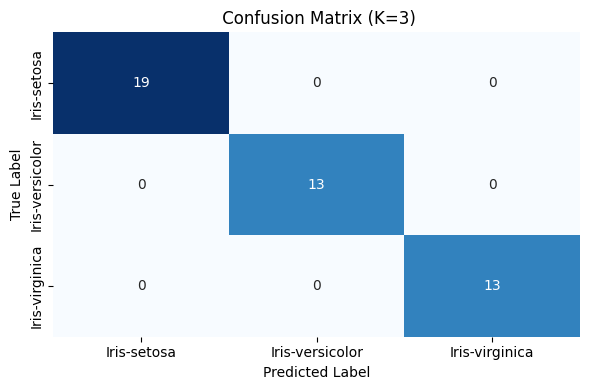

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

# ✅ Classification Report
print("\n✅ Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# ✅ Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title(f' Confusion Matrix (K={best_k})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig('../visuals/knn_confusion_matrix.png')
plt.show()


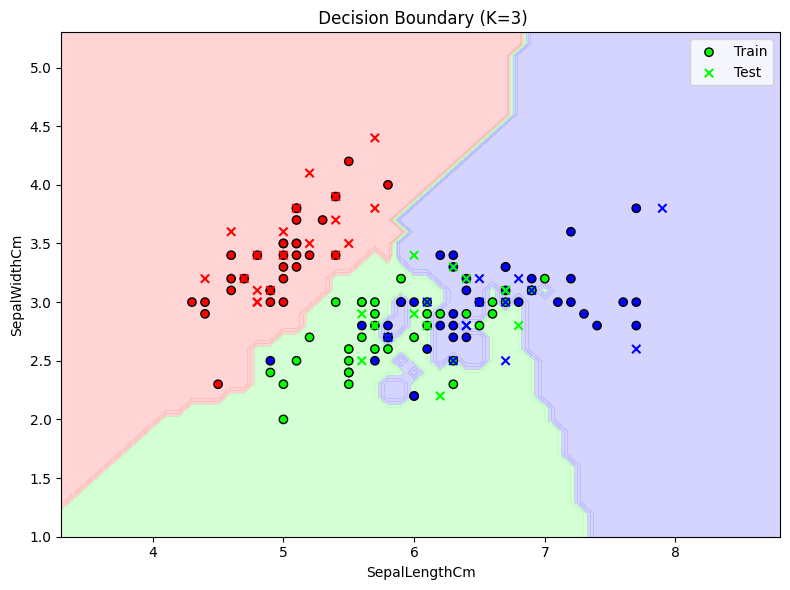

In [24]:
# ✅ Visualizing Decision Boundaries (Using first 2 features for simplicity)

from matplotlib.colors import ListedColormap

# Only use first 2 features for 2D visualization
X_vis = X.iloc[:, :2]
X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(X_vis, y, test_size=0.3, random_state=42)

knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_vis_train, y_vis_train)

# Mesh grid for decision boundary
x_min, x_max = X_vis.iloc[:, 0].min() - 1, X_vis.iloc[:, 0].max() + 1
y_min, y_max = X_vis.iloc[:, 1].min() - 1, X_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# ✅ Fix for feature names warning
grid_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X_vis.columns)
Z = knn_vis.predict(grid_points)
Z = Z.reshape(xx.shape)

# ✅ Plot
plt.figure(figsize=(8, 6))
cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.5)

plt.scatter(X_vis_train.iloc[:, 0], X_vis_train.iloc[:, 1], c=y_vis_train, cmap=cmap_points, edgecolor='k', marker='o', label='Train')
plt.scatter(X_vis_test.iloc[:, 0], X_vis_test.iloc[:, 1], c=y_vis_test, cmap=cmap_points, marker='x', label='Test')  # Removed edgecolor for x marker

plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title(f' Decision Boundary (K={best_k})')
plt.legend()
plt.tight_layout()
plt.savefig('../visuals/knn_decision_boundary.png')
plt.show()


In [25]:
# ✅ Summary and Final Remarks

print("\n✅ Project Summary:\n")
print(f"- Dataset Used: Iris Dataset (3-class classification problem)")
print(f"- Best K Found: {best_k}")
print(f"- Final Test Accuracy: {accuracy:.4f}")

print("\n✅ Evaluation Metrics Covered:")
print("- Accuracy")
print("- Classification Report (Precision, Recall, F1-Score)")
print("- Confusion Matrix")

print("\n✅ Visualizations Generated:")
print("- Error Rate vs K plot")
print("- Confusion Matrix Heatmap")
print("- Decision Boundary Visualization")

print("\n✅ Final Note:")
print("This project demonstrated K-Nearest Neighbors (KNN) for classification using the classic Iris dataset.\n")
print("KNN is a simple yet powerful algorithm, especially suitable for small, clean datasets.\nFor larger or more complex data, remember to tune hyperparameters carefully and use scaling/normalization.")

print("\n✅ All generated plots are saved inside the ../visuals/ directory.")



✅ Project Summary:

- Dataset Used: Iris Dataset (3-class classification problem)
- Best K Found: 3
- Final Test Accuracy: 1.0000

✅ Evaluation Metrics Covered:
- Accuracy
- Classification Report (Precision, Recall, F1-Score)
- Confusion Matrix

✅ Visualizations Generated:
- Error Rate vs K plot
- Confusion Matrix Heatmap
- Decision Boundary Visualization

✅ Final Note:
This project demonstrated K-Nearest Neighbors (KNN) for classification using the classic Iris dataset.

KNN is a simple yet powerful algorithm, especially suitable for small, clean datasets.
For larger or more complex data, remember to tune hyperparameters carefully and use scaling/normalization.

✅ All generated plots are saved inside the ../visuals/ directory.
